**PROBLEM STATEMENT**

As a business manager ,try to find out the weak areas where you can work to make more profit

**OBJECTIVE**

1) Using Exploratory Data Analysis (EDA) on dataset 'SampleSuperstore' derive the possible business problems
2) Explore the weak areas where profit can be increased by implementing ncessary improvements.

**TOOL USED:** Python

**IDE:** Jupyter Notebook

**DATASET:** https://bit.ly/3i4rbWl

**STEPS FOLLOWED:**

1)Loading the Dataset

2)Understanding the data

3)Data Quality check and missing values

4)Checking for outliers

5)Data Visualization and Analysis

6)Interpretation and conclusion

7)Recommendations

In [584]:
#filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [586]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Loading the data**

In [589]:
#loading the reqd dataset
file_path=r'C:\Users\hp\Downloads\SampleSuperstore.csv'
retail=pd.read_csv(file_path)

#checking the top rows of the dataset
retail.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [590]:
#sorting by the profit in ascending order
retail.sort_values(by = 'Profit',ascending = True)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7772,Standard Class,Consumer,United States,Lancaster,Ohio,43130,East,Technology,Machines,4499.985,5,0.7,-6599.9780
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808


**2.Understanding the data**

In [592]:
#checking column names
retail.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [594]:
#checking data dimension
retail.shape

(9994, 13)

In [598]:
#checking column information
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [599]:
#summary statistics
retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


**3.Data Quality check and Missing values**


In [603]:
#checking for missing values 
retail.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

INITIAL INFERENCE: 1) There are no missing values
2)Columns have correct data types accordingly.

In [606]:
#checking the country column 
retail.Country.unique()

array(['United States'], dtype=object)

INFERENCE: The Country column consists of only United States and hence we can drop this column as it will not aid in the analysis

In [609]:
#checking data dimensions for region
retail.groupby(['State','City',])['Region'].count().shape

(604,)

In [611]:
#checking for data dimensions of postal code
retail.groupby(['State','City',])['Postal Code'].count().shape

(604,)

INFERENCE: Shape of dataframe of both region and postal code are same

In [614]:
#checking if the number counts are matching or not by taking the difference of two data frames
df1= retail.groupby(['State','City',])['Region'].count()
df2=retail.groupby(['State','City'])['Postal Code'].count()
print(df2[(df2!=df1)].dropna(how='all'))
print(df1[(df1!=df2)].dropna(how='all'))
df1

Series([], Name: Postal Code, dtype: int64)
Series([], Name: Region, dtype: int64)


State      City      
Alabama    Auburn         6
           Decatur       13
           Florence       5
           Hoover         4
           Huntsville    10
                         ..
Wisconsin  Superior       9
           Waukesha       1
           Wausau         4
           West Allis     2
Wyoming    Cheyenne       1
Name: Region, Length: 604, dtype: int64

INFERENCE: As Postal Code is by region we are dropping Postal Code

In [617]:
#dropping columns Country and Postal Code
retail.drop(['Country','Postal Code'],axis=1, inplace=True)

In [619]:
retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [621]:
#cross checking data dimension
retail.shape

(9994, 11)

In [623]:
#The dataset has Sub-category and category columns whereas quantity corresponds to a particular product from sub-category so there can be multiple quantity for a category considering all the other options.
#checking granularity of data on product level or category level
retail.groupby(['State','City','Region','Ship Mode','Segment','Category','Sub-Category'])['Quantity'].nunique().reset_index()

,State,City,Region,Ship Mode,Segment,Category,Sub-Category,Quantity
0,Alabama,Auburn,South,Second Class,Consumer,Office Supplies,Envelopes,1
1,Alabama,Auburn,South,Second Class,Consumer,Office Supplies,Labels,1
2,Alabama,Auburn,South,Standard Class,Consumer,Furniture,Chairs,1
3,Alabama,Auburn,South,Standard Class,Consumer,Office Supplies,Paper,1
4,Alabama,Auburn,South,Standard Class,Consumer,Office Supplies,Storage,1
...,...,...,...,...,...,...,...,...
5791,Wisconsin,Wausau,Central,Standard Class,Consumer,Office Supplies,Binders,1
5792,Wisconsin,Wausau,Central,Standard Class,Consumer,Office Supplies,Storage,2
5793,Wisconsin,West Allis,Central,Second Class,Corporate,Furniture,Bookcases,1
5794,Wisconsin,West Allis,Central,Second Class,Corporate,Office Supplies,Binders,1


INFERENCE:Checking granularity of data at the sub-category level

In [626]:
retail.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**4.Checking for outliers**

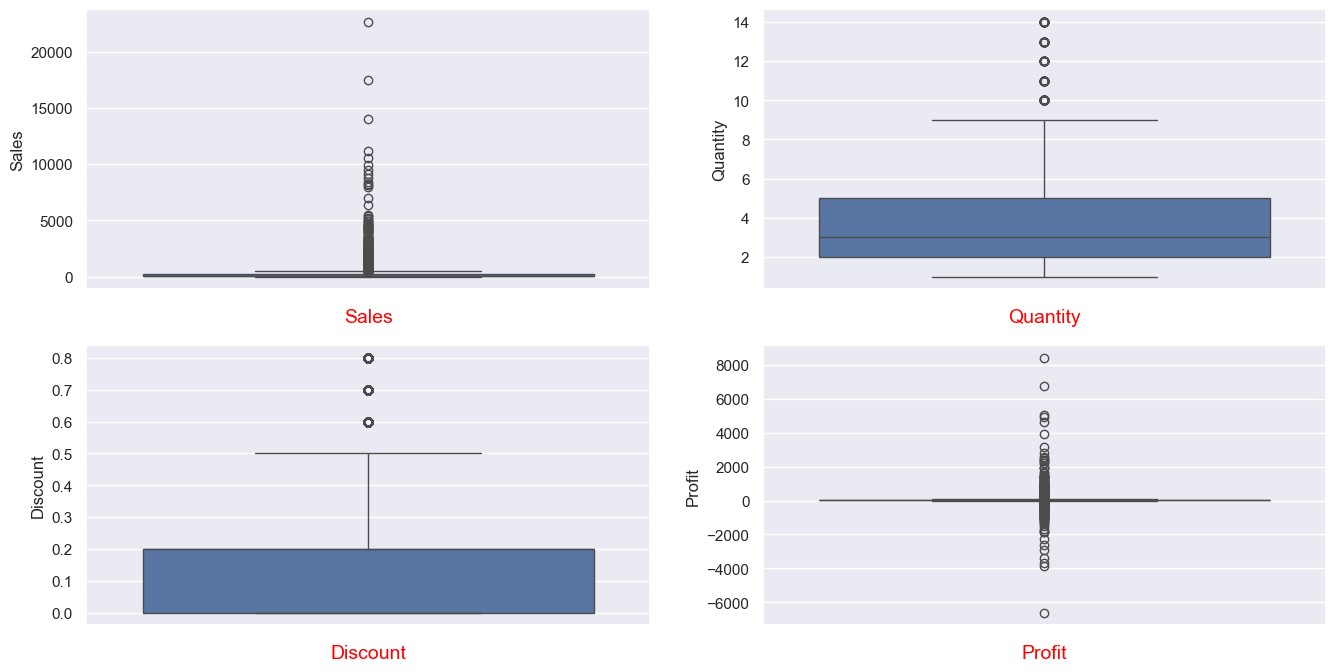

In [629]:
#boxplot to check for outliers
plt.figure(figsize=[16,8])
sns.set_theme()
plt.subplot(2,2,1)
sns.boxplot(retail['Sales'])
plt.xlabel('Sales', fontdict={'color':'red','fontsize':14})

plt.subplot(2,2,2)
sns.boxplot(retail['Quantity'])
plt.xlabel('Quantity', fontdict={'color':'red','fontsize':14})

plt.subplot(2,2,3)
sns.boxplot(retail['Discount'])
plt.xlabel('Discount', fontdict={'color':'red','fontsize':14})

plt.subplot(2,2,4)
sns.boxplot(retail['Profit'])
plt.xlabel('Profit', fontdict={'color':'red','fontsize':14})

plt.show()

INFERENCE: Large number of outliers present in sales and profit column

In [631]:
#pattern across various percentile to check for outliers
retail.describe(percentiles=[0.25,0.75,0.80,0.90,0.95,0.99])

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
80%,281.372000,5.000000,0.200000,41.038800
90%,572.706000,7.000000,0.400000,89.281620
95%,956.984245,8.000000,0.700000,168.470400


INFERENCE: Sales and Profit columns contain large number of outliers

**5. Data Visualization and Analysis**

**_5.1 Univariate Analysis_**

_Categorical Unordered Univariate Analysis_

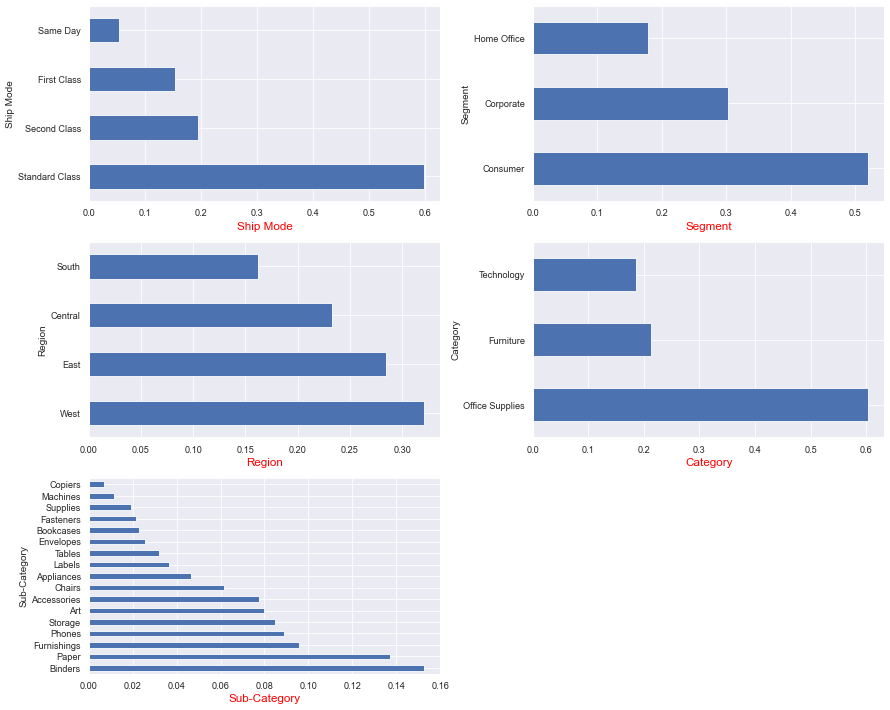

In [635]:
#plotting the bar graph percentages of variouscolumn: Ship Mode, Segment, Region, Category, Sub-Category
plt.figure(figsize=[15,12], dpi=60, facecolor='w', edgecolor='k')
sns.set_theme()

plt.subplot(3,2,1)
retail['Ship Mode'].value_counts(normalize=True).plot.barh()
plt.xlabel('Ship Mode', fontdict={'color':'red','size':14})

plt.subplot(3,2,2)
retail['Segment'].value_counts(normalize=True).plot.barh()
plt.xlabel('Segment', fontdict={'color':'red','size':14})

plt.subplot(3,2,3)
retail['Region'].value_counts(normalize=True).plot.barh()
plt.xlabel('Region', fontdict={'color':'red', 'size':14})

plt.subplot(3,2,4)
retail['Category'].value_counts(normalize=True).plot.barh()
plt.xlabel('Category', fontdict={'color':'red','size':14})

plt.subplot(3,2,5)
retail['Sub-Category'].value_counts(normalize=True).plot.barh()
plt.xlabel('Sub-Category', fontdict={'color':'red', 'size':14})

plt.tight_layout()
plt.show()






INFERENCES: 1)Same day transactions are the lowest whereas the standard class transactions are the highest.

2)The consumer segment has the highest numbers

3)West region has the highest transaction followed by East.

4)The office supplies category shows the highest distribution.

5)The binders sub-category has the highest proportion with the copiers category having the least.

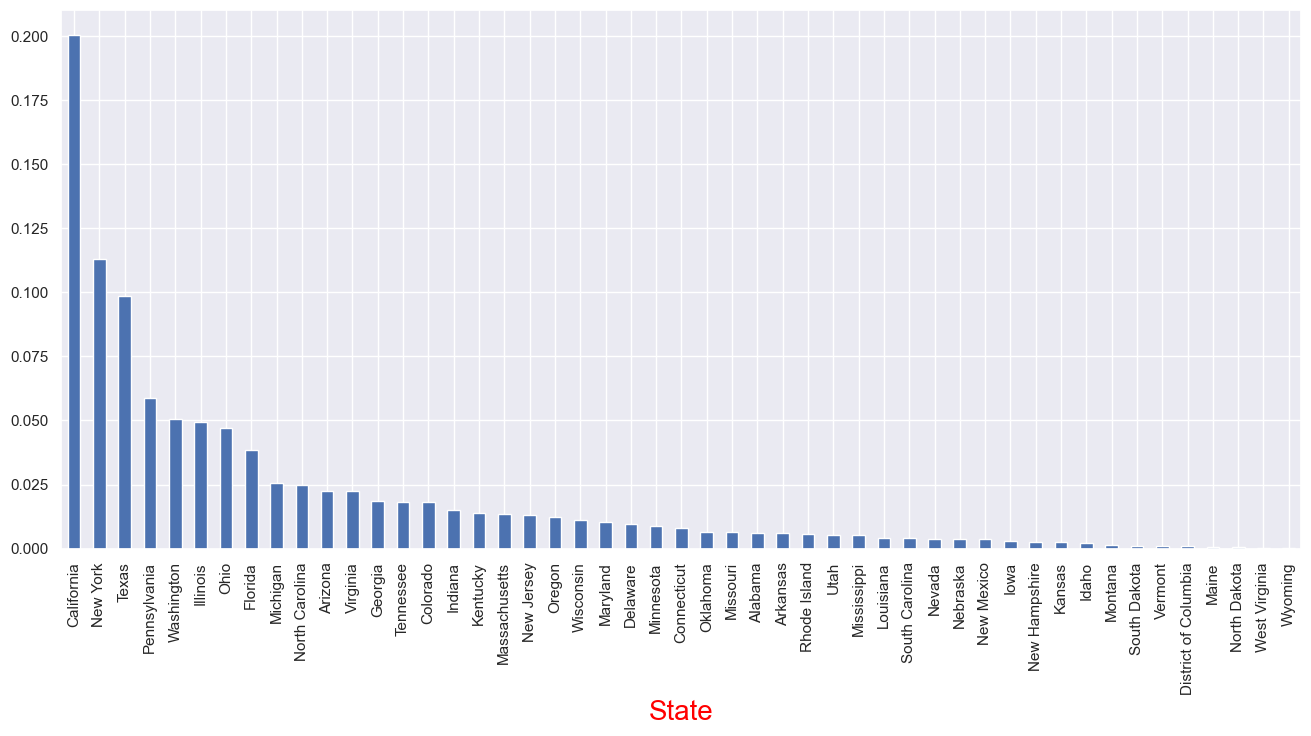

In [637]:
#plotting the bar diagram of percentage distribution of various states

plt.figure(figsize=[16,7])
sns.set_theme()

retail['State'].value_counts(normalize=True).plot.bar()
plt.xlabel('State', fontdict={'color':'red', 'size':20})

plt.show()


INFERENCE: California shows the highest transactions with New York, Texas, Pennsylvania showing moderate level transactions.

**_5.2 Bivariate Analysis_**

**i) Numeric-numeric Analysis**

There are 3 ways to analyse the numeric-numeric data types simultaneously-

a)Scatter plot

b)Correlation Matrix

c)Pair plot



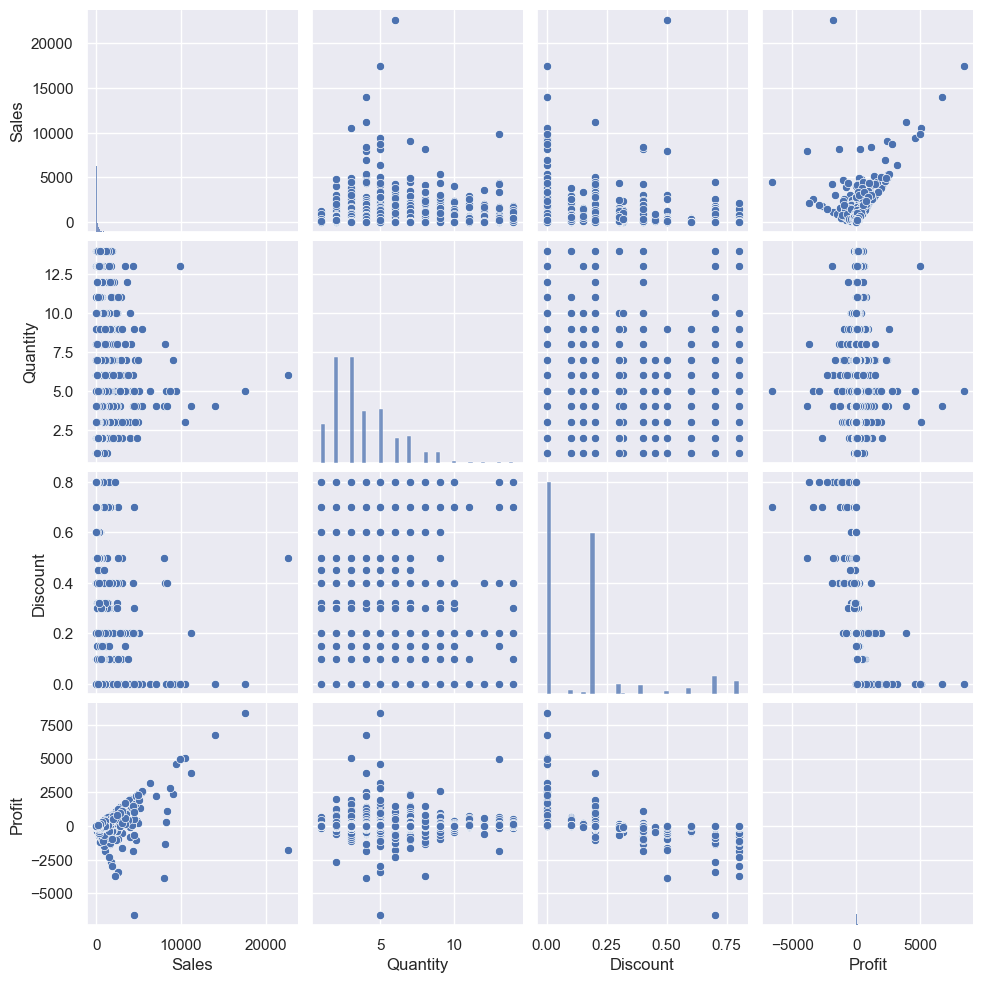

In [722]:
#plot the pair plot of Sales, Quantity, Discount and Profit in retail dataframe
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(retail[['Sales','Quantity','Discount','Profit']])
plt.show()

**Inference:**

1) No patterns for Quantity over Profit and Sales but at 5 we see highest Sales on Profit at Quantity

2) Discount and Profit are highly correlated in negative direction i.e, these are inversely proportional so, if discount for a particular sale increases then this will decrease the profit

3) Highest Sales at 50% discount appears to be an outlier

   

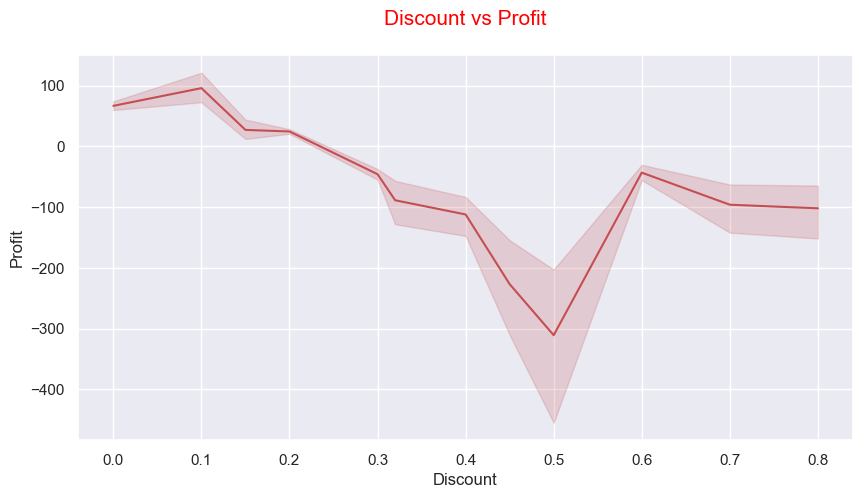

In [647]:
#Visualizing trend of Sales, Profit, Discount and Quantity using line graph
#trend of profit across various discount
plt.figure(figsize=(10,5))
plt.title('Discount vs Profit\n', fontdict={'color':'red','size':15})
sns.lineplot(x='Discount',y='Profit', data=retail , color='r')
plt.show()

INFERENCE: 1. For minimum discount profit was good but as discount increases profit decreases

2) Profit is lowest at 50% discount


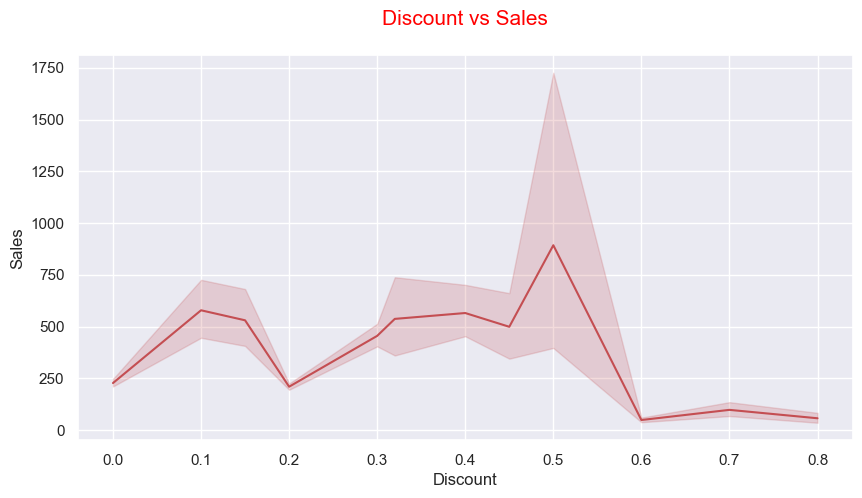

In [649]:
#trend of sales across various discount
plt.figure(figsize=(10,5))
plt.title('Discount vs Sales\n', fontdict={'color':'red','size':15})
sns.lineplot(x='Discount', y='Sales', data=retail, color='r')
plt.show()

INFERENCE: At 50% discount there is peak sale and beyond 50% sales fall which might occur due to fall in product quality due to a higher rate of discount

**Numeric-Numeric Analysis using Correlation Heat Map**

In [652]:
#creating a matrix using Sales, quantity, discount,and profit in retail dataframeas rows and columns
matrix=retail[['Sales','Quantity','Discount','Profit']].corr()
matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


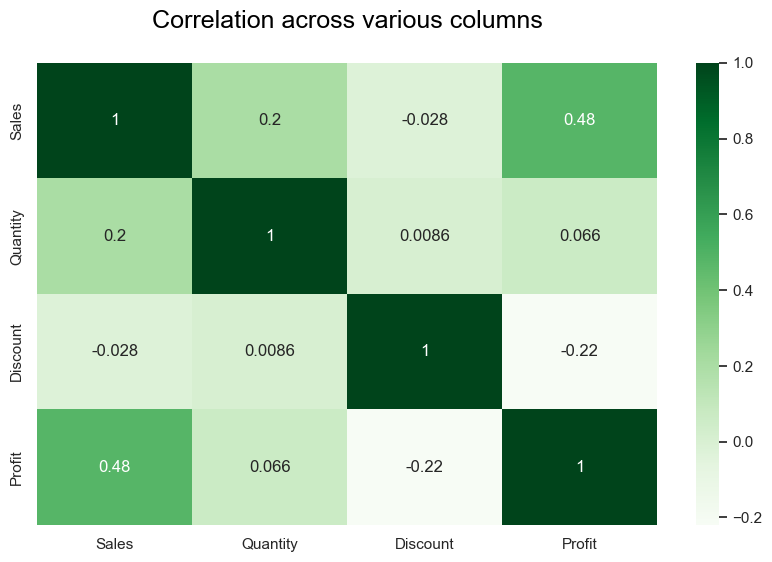

In [653]:
#heatmap of above correlation matrix
plt.figure(figsize=[10,6])
plt.title('Correlation across various columns\n', fontdict={'color':'black','size':18})
sns.heatmap(matrix, cmap='Greens',annot=True)
plt.show()

INFERENCE:a)Profit and Sales have the highest correlation of 0.48

b)Profit and Discount have a negative correlation of -0.22

**_b. Numerical Categorical Analysis_**

_Ship Mode vs Profit & Ship Mode vs Sales_

In [657]:
#groupby the ship mode to find the mean of the profit and sales separately
retail.groupby('Ship Mode')[['Profit','Sales']].mean()

,Profit,Sales
Ship Mode,,
First Class,31.839948,228.497024
Same Day,29.266591,236.396179
Second Class,29.535545,236.089239
Standard Class,27.494770,227.583067


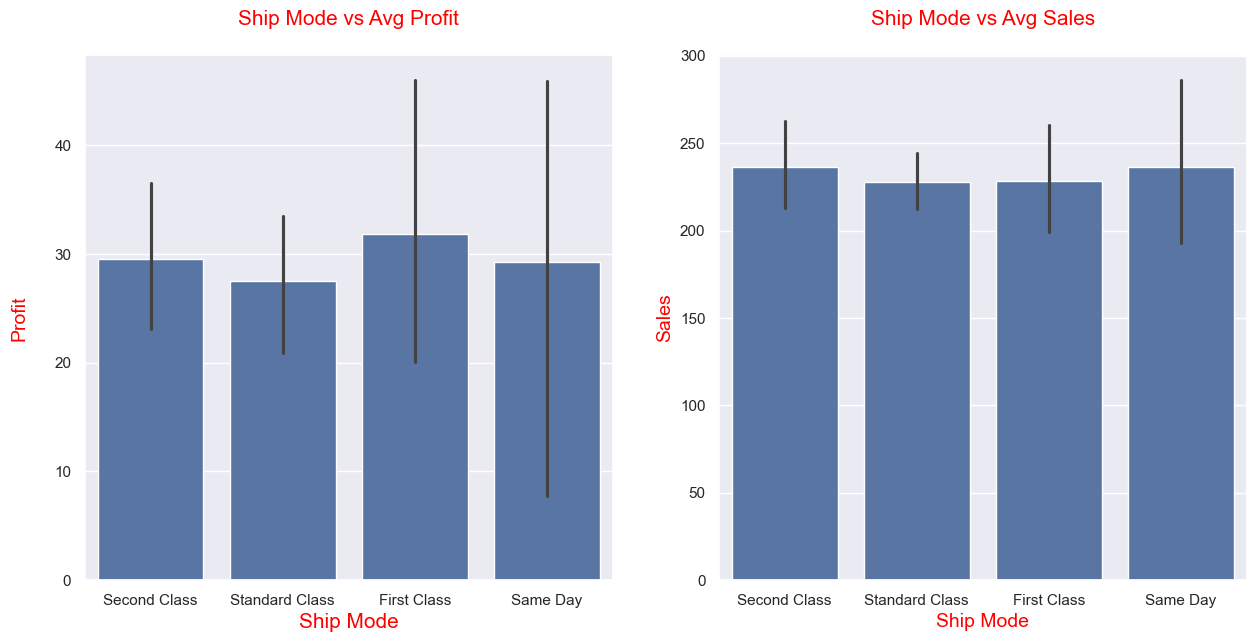

In [658]:
#bar graph of profit for ship mode categories
plt.figure(figsize=[15,15])
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(x='Ship Mode', y='Profit', data=retail)
plt.title('Ship Mode vs Avg Profit\n', fontdict={'color':'red','size':15})
plt.xlabel('Ship Mode', fontdict={'color':'red','size':15})
plt.ylabel('Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for ship mode categories
plt.subplot(2,2,2)
sns.barplot(x='Ship Mode', y='Sales', data=retail)
plt.title('Ship Mode vs Avg Sales\n', fontdict={'color':'red','size':15})
plt.xlabel('Ship Mode', fontdict={'color':'red','size':14})
plt.ylabel('Sales', fontdict={'color':'red','size':14})
plt.show()


INFERENCE: 1. First Class shipment mode is making highest average profit.

    2. Same Day Shipment Mode is making highest average sales.

    3.Standard Class shipment has less than average profit and sales.

**Visualizing Shipment Mode wise Total Profit or Sales**

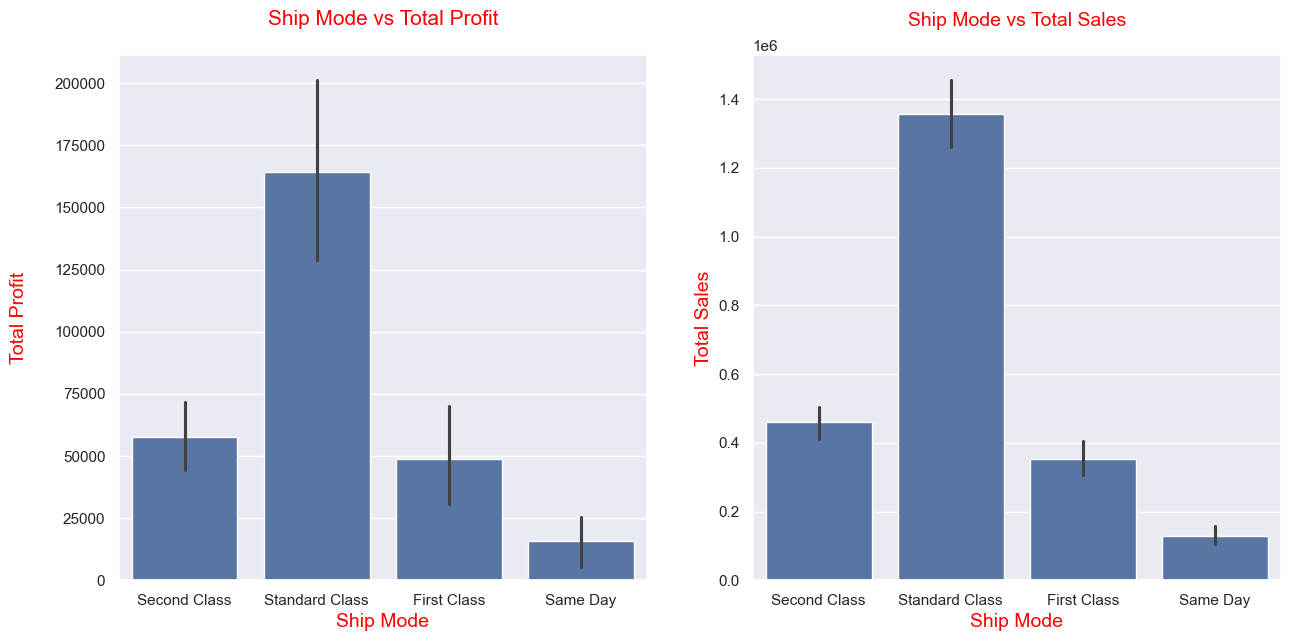

In [661]:
#bar graph of total profit for ship mode categories
plt.figure(figsize=[15,15])
sns.set_theme()
plt.subplot(2,2,1)
sns.barplot(x='Ship Mode', y='Profit',data=retail,estimator = sum)
plt.title('Ship Mode vs Total Profit\n', fontdict={'color':'red', 'size':15})
plt.xlabel('Ship Mode', fontdict={'color':'red', 'size':14})
plt.ylabel('Total Profit\n', fontdict={'color':'red', 'size':14})

#bar graph of total sales for ship mode categories
plt.subplot(2,2,2)
sns.barplot(x='Ship Mode', y='Sales',data=retail,estimator = sum)
plt.title('Ship Mode vs Total Sales\n', fontdict={'color':'red','size':14})
plt.xlabel('Ship Mode', fontdict={'color':'red','size':14})
plt.ylabel('Total Sales', fontdict={'color':'red','size':14})
plt.show()

INFERENCE:
1)Though average profit of same day shipment mode is more,it is making less overall profit and sale for business.Less customers might prefer same day shipment mode due to certain reasons. Same day shipment mode needs to be marketed more.

2)Average profit for Standard class shipment mode is less than total profit for standard class leading to the conclusion that more customers prefer it.

**Segment vs Profit and Segment vs Sales**

In [664]:
#groupby the segment to find the mean of the profit and sales respectively
retail.groupby('Segment')[['Profit','Sales']].mean().round(2)

,Profit,Sales
Segment,,
Consumer,25.84,223.73
Corporate,30.46,233.82
Home Office,33.82,240.97


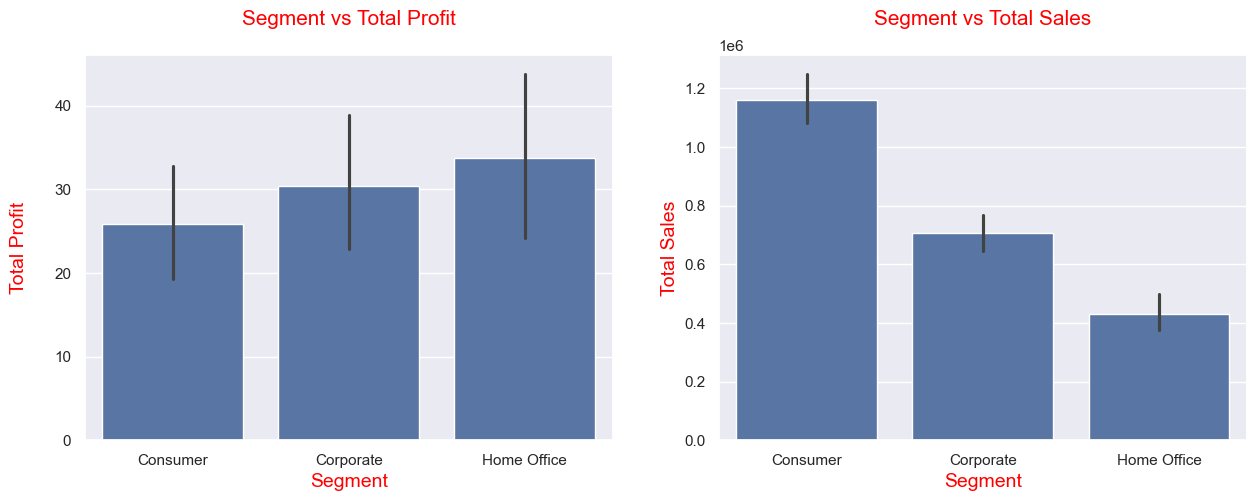

In [665]:
#consumer segment having highest transaction
#bar plot of profit for various segments
plt.figure(figsize=[15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(x='Segment',y='Profit',data=retail)
plt.title('Segment vs Total Profit\n', fontdict={'color':'red','size':15})
plt.xlabel('Segment', fontdict={'color':'red','size':14})
plt.ylabel('Total Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for various segments
plt.subplot(1,2,2)
sns.barplot(x='Segment',y='Sales',data=retail,estimator=sum)
plt.title('Segment vs Total Sales\n', fontdict={'color':'red','size':15})
plt.xlabel('Segment', fontdict={'color':'red','size':14})
plt.ylabel('Total Sales', fontdict={'color':'red', 'size':14})
plt.show()


INFERENCE: Total profit of the home office segment is the highest whereas the total sales of the consumer segment is the highest. Home office segment despite having lowest sales show highest profit, hence this segment needs to be marketed more.

**State vs Profit and State vs Sales**

In [668]:
#groupby state to find mean of profit and sales respectively
retail.groupby('State')[['Profit','Sales']].mean()

,Profit,Sales
State,,
Alabama,94.865989,319.846557
Arizona,-15.303235,157.508933
Arkansas,66.811452,194.635500
California,38.171608,228.729451
Colorado,-35.867351,176.418231
Connecticut,42.823071,163.223866
Delaware,103.930988,285.948635
District of Columbia,105.958930,286.502000
Florida,-8.875461,233.612815


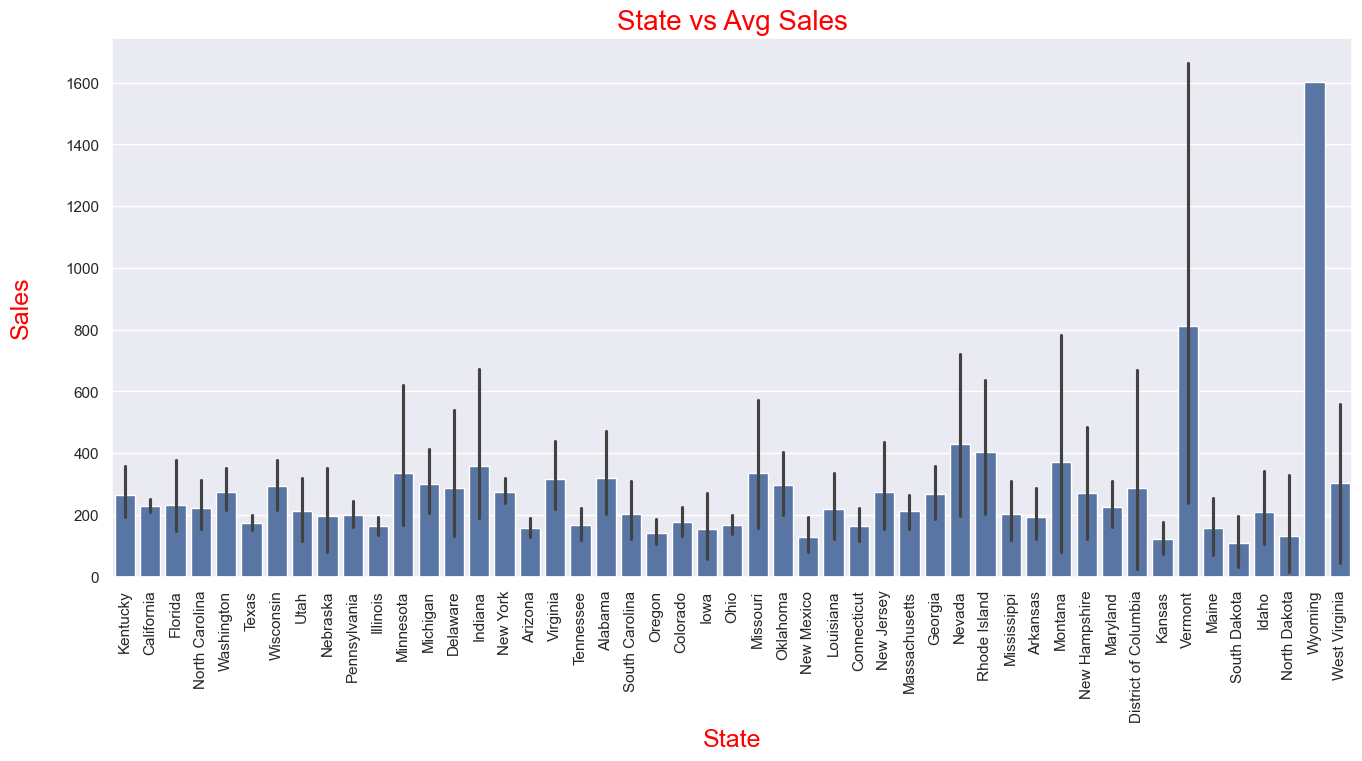

In [669]:
#bar plot of sales across various states
plt.figure(figsize=[16,7])
sns.set_theme()

sns.barplot(x='State', y='Sales', data=retail)
plt.title('State vs Avg Sales', fontdict={'color':'red','size':20})
plt.xticks(rotation=90)
plt.xlabel('State', fontdict={'color':'red','size':18})
plt.ylabel('Sales\n', fontdict={'color':'red', 'size':18})
plt.show()

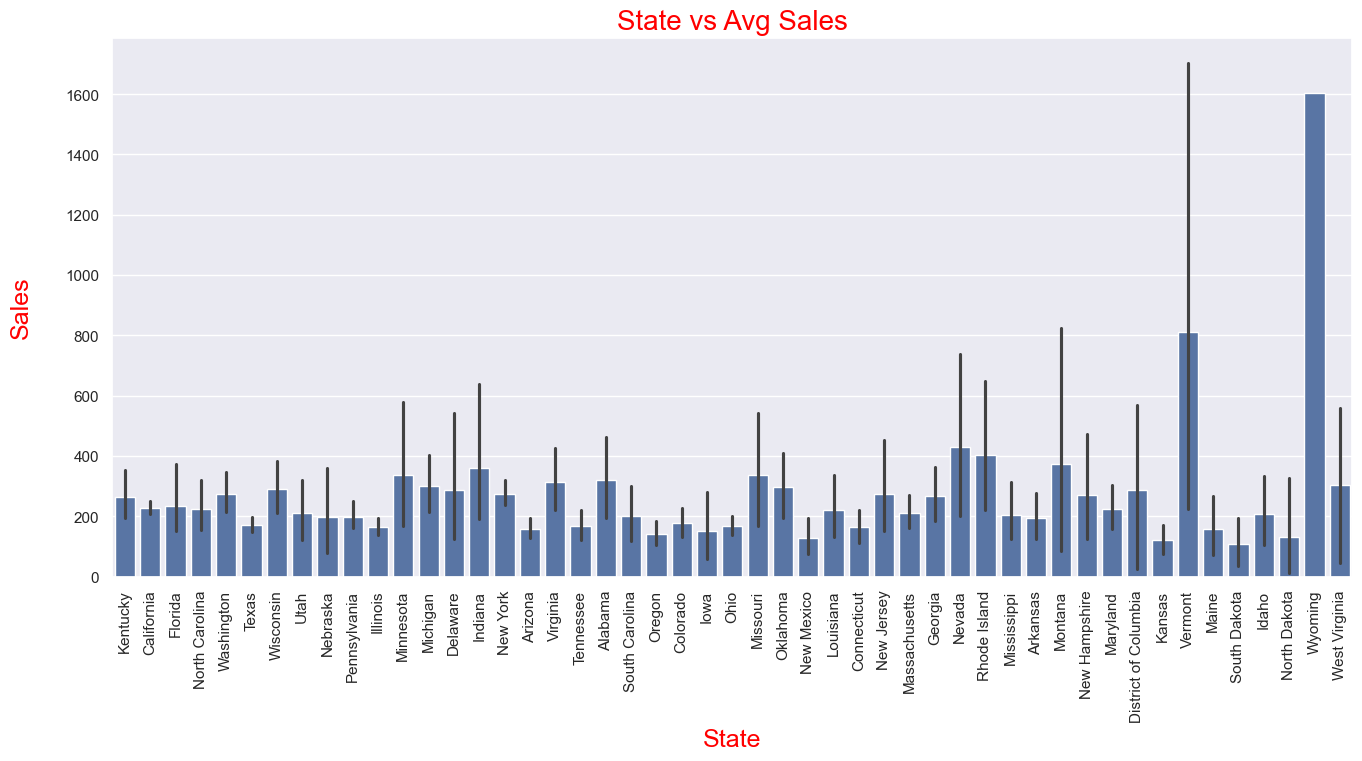

In [670]:
#bar plot of sales across various states
plt.figure(figsize=[16,7])
sns.set_theme()

sns.barplot(x='State', y='Sales', data=retail)
plt.title('State vs Avg Sales', fontdict={'color':'red','size':20})
plt.xticks(rotation=90)
plt.xlabel('State', fontdict={'color':'red','size':18})
plt.ylabel('Sales\n', fontdict={'color':'red', 'size':18})
plt.show()

INFERENCE: Vermont and Wyoming with the highest sales.

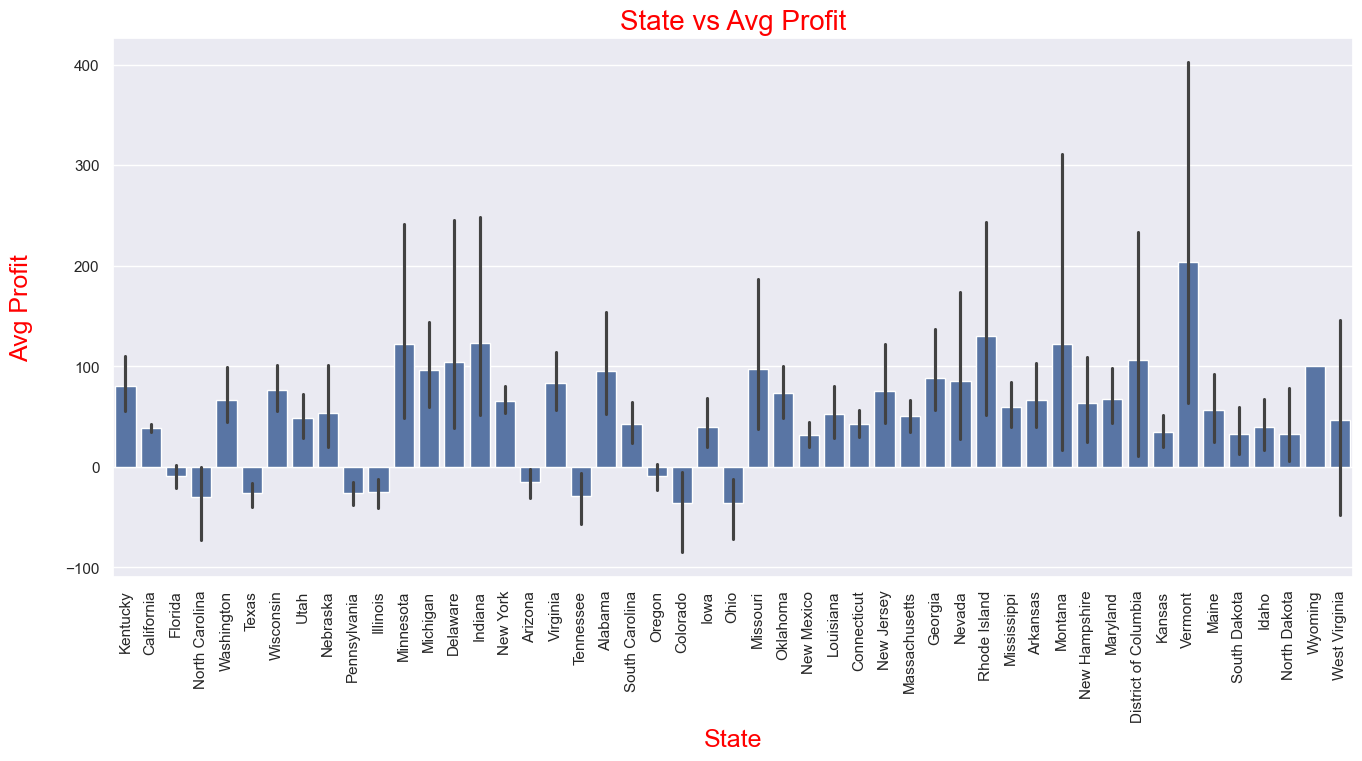

In [672]:
#bar plot of profit across various states
plt.figure(figsize=[16,7])
sns.set_theme()

sns.barplot(x='State', y='Profit', data=retail)
plt.title('State vs Avg Profit', fontdict={'color':'red','size':20})
plt.xticks(rotation=90)
plt.xlabel('State', fontdict={'color':'red','size':18})
plt.ylabel('Avg Profit\n', fontdict={'color':'red', 'size':18})
plt.show()

INFERENCE: Vermont has the highest profit. California,South Carolina,Iowa,New Mexico,Kansas,South Dakota, North Dakota having very less profits.Florida,North Carolina,Texas,Pennsylvania,Illinois,Oregon,Colorado,Ohio showing negative profits.

California has less average profit but more transactions than other states

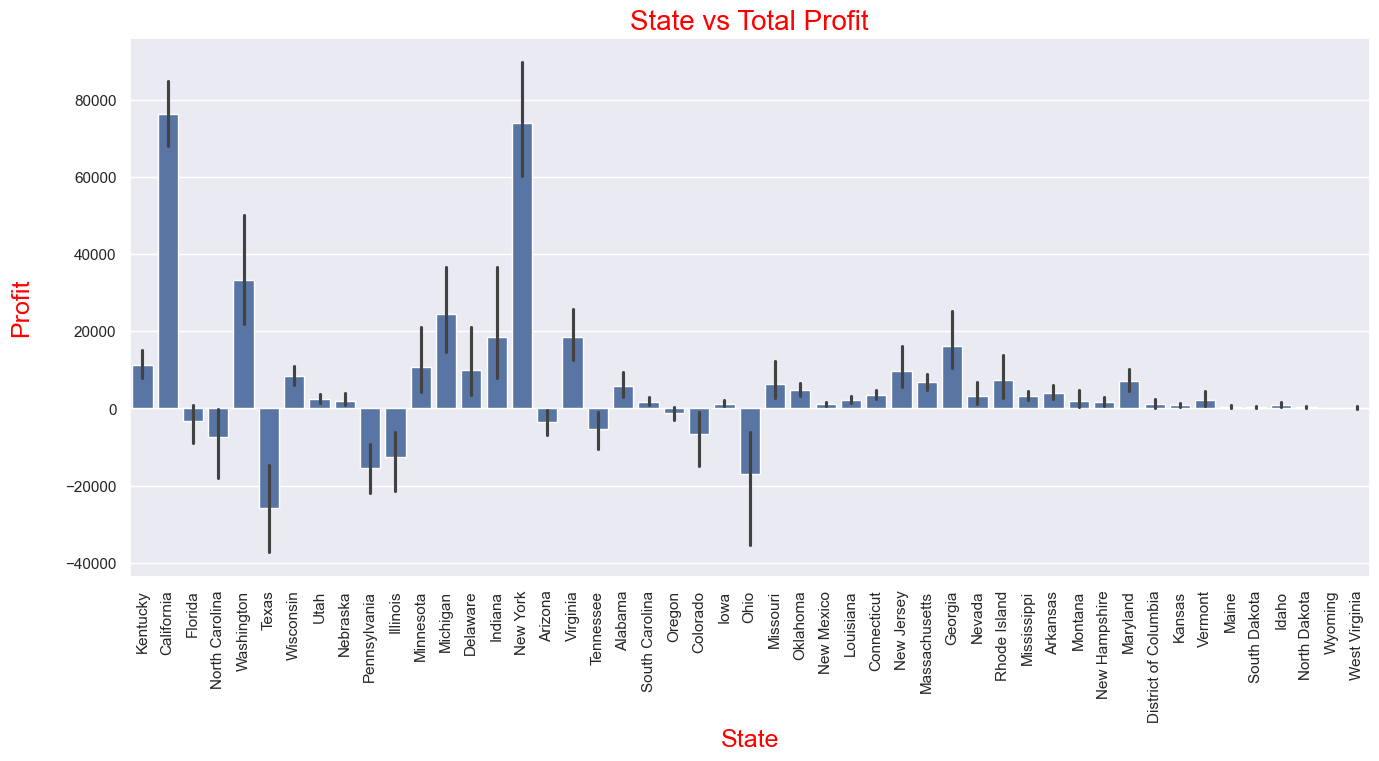

In [675]:
#bar plot of total profit across various cities
plt.figure(figsize=[16,7])
sns.set_theme()
sns.barplot(x='State',y='Profit',data=retail,estimator=sum)
plt.title('State vs Total Profit',fontdict={'color':'red','size':20})
plt.xticks(rotation=90)
plt.xlabel('State',fontdict={'color':'red','size':18})
plt.ylabel('Profit\n',fontdict={'color':'red','size':18})
plt.show()

INFERENCE: California and New York have the highest profit. Texas has highest negative profit

**Region vs Profit and Region vs Sales**

In [678]:
#groupby the region to find mean of profit and sales resp
retail.groupby('Region')[['Profit','Sales']].mean()

,Profit,Sales
Region,,
Central,17.092709,215.772661
East,32.135808,238.336110
South,28.857673,241.803645
West,33.849032,226.493233


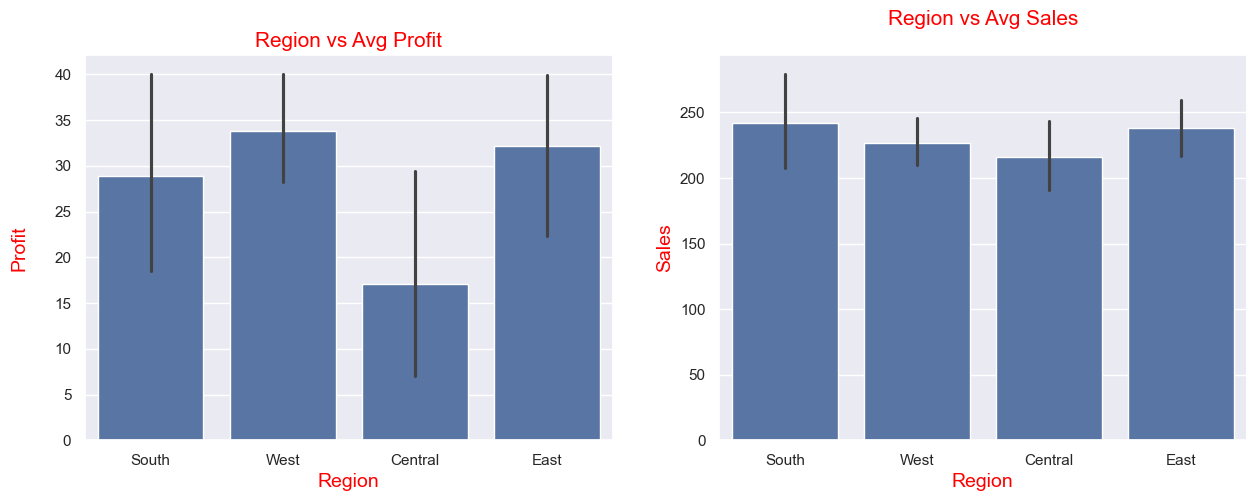

In [679]:
#bar plot of profit for different regions
plt.figure(figsize=[15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(x='Region', y='Profit', data=retail)
plt.title('Region vs Avg Profit', fontdict={'color':'red','size':15})
plt.xlabel('Region', fontdict={'color':'red','size':14})
plt.ylabel('Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for diff regions
plt.subplot(1,2,2)
sns.barplot(x='Region', y='Sales', data=retail)
plt.title('Region vs Avg Sales\n', fontdict={'color':'red','size':15})
plt.xlabel('Region', fontdict={'color':'red','size':14})
plt.ylabel('Sales', fontdict={'color':'red','size':14})
plt.show()


INFERENCE: Highest profit in west and East Region. South and East have the highest sales. Central region despite having decent sales shows the lowest profit.Profit needs to be increased in central region.

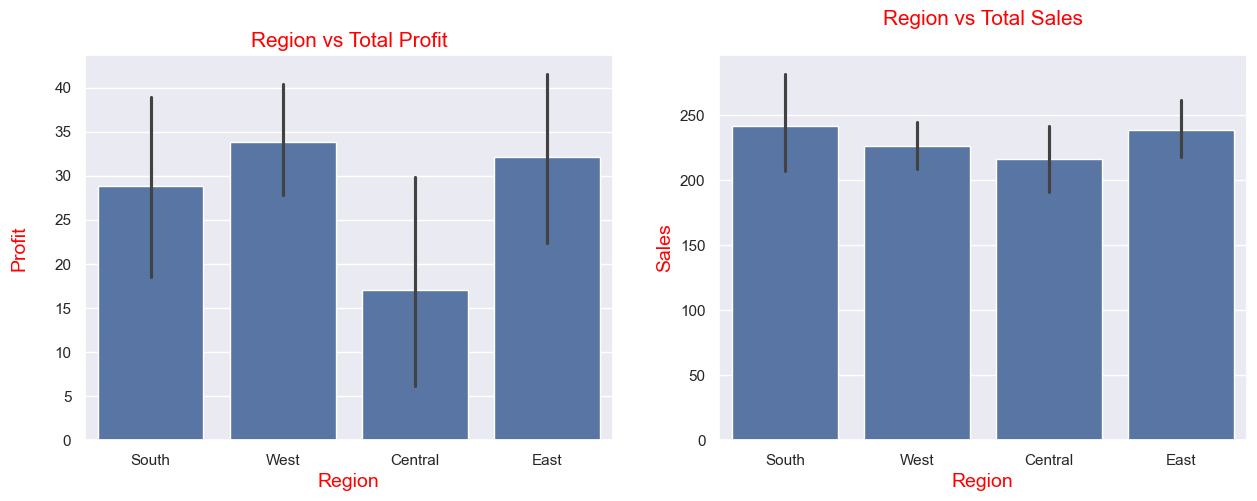

In [681]:
#bar plot of profit for different regions
plt.figure(figsize=[15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(x='Region', y='Profit', data=retail)
plt.title('Region vs Total Profit', fontdict={'color':'red','size':15})
plt.xlabel('Region', fontdict={'color':'red','size':14})
plt.ylabel('Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for diff regions
plt.subplot(1,2,2)
sns.barplot(x='Region', y='Sales', data=retail)
plt.title('Region vs Total Sales\n', fontdict={'color':'red','size':15})
plt.xlabel('Region', fontdict={'color':'red','size':14})
plt.ylabel('Sales', fontdict={'color':'red','size':14})
plt.show()


INFERENCE: Overall sales more in west region. less in south region. central region has high sales but low profit.

**Category vs Profit and Category vs Sales**

In [684]:
retail.groupby('Category')[['Profit','Sales']].mean()

,Profit,Sales
Category,,
Furniture,8.699327,349.834887
Office Supplies,20.327050,119.324101
Technology,78.752002,452.709276


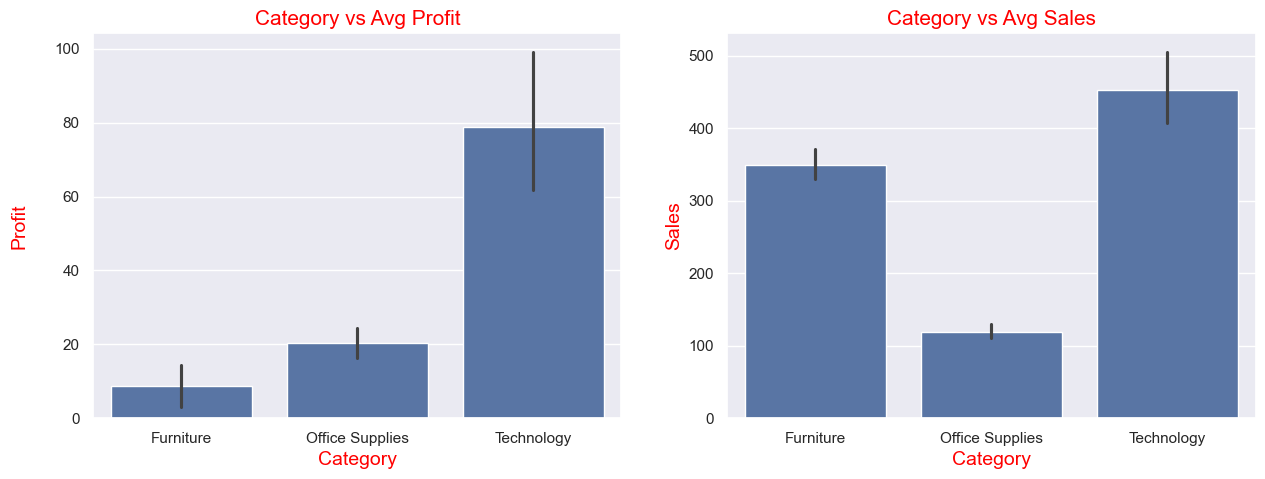

In [685]:
#bar plot of profit for different categories
plt.figure(figsize=[15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(x='Category', y='Profit', data=retail)
plt.title('Category vs Avg Profit', fontdict={'color':'red','size':15})
plt.xlabel('Category', fontdict={'color':'red','size':14})
plt.ylabel('Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for diff categories
plt.subplot(1,2,2)
sns.barplot(x='Category', y='Sales', data=retail)
plt.title('Category vs Avg Sales', fontdict={'color':'red','size':15})
plt.xlabel('Category', fontdict={'color':'red','size':14})
plt.ylabel('Sales', fontdict={'color':'red','size':14})
plt.show()


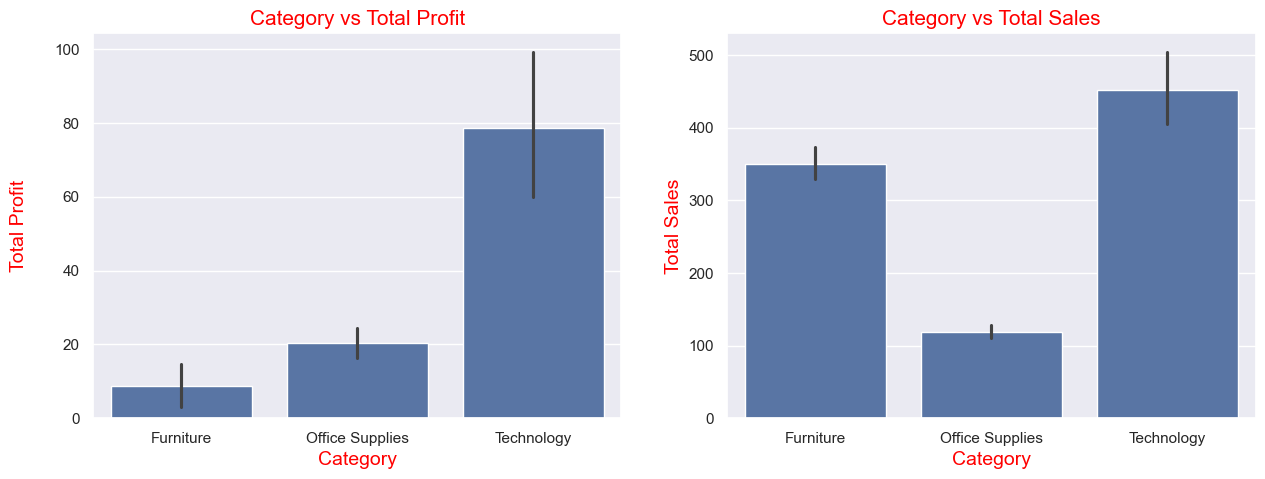

In [686]:
#bar plot of profit for different categories
plt.figure(figsize=[15,5])
sns.set_theme()
plt.subplot(1,2,1)
sns.barplot(x='Category', y='Profit', data=retail)
plt.title('Category vs Total Profit', fontdict={'color':'red','size':15})
plt.xlabel('Category', fontdict={'color':'red','size':14})
plt.ylabel('Total Profit\n', fontdict={'color':'red','size':14})

#bar plot of sales for diff categories
plt.subplot(1,2,2)
sns.barplot(x='Category', y='Sales', data=retail)
plt.title('Category vs Total Sales', fontdict={'color':'red','size':15})
plt.xlabel('Category', fontdict={'color':'red','size':14})
plt.ylabel('Total Sales', fontdict={'color':'red','size':14})
plt.show()


INFERENCE: 1)Products from Technology category making the highest sales and profit and hence having good margin.

    2) Office Supplies category having low sales and low profit.

3)Products from furniture category having high sales but low profit.It might be due to discounts.

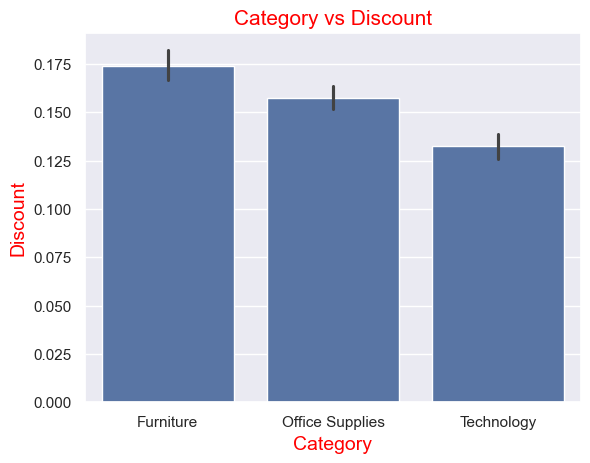

In [688]:
#plotting category with avg discount
sns.barplot(x='Category',y='Discount',data=retail)
plt.title('Category vs Discount', fontdict={'color':'red','size':15})
plt.xlabel('Category', fontdict={'color':'red','size':14})
plt.ylabel('Discount', fontdict={'color':'red','size':14})
plt.show()

INFERENCE: Products in the Furniture Category are having huge discounts and hence there is huge sell in Furniture products but least profit.

**Sub-Category vs Profit and Sub-Category vs Sales**

In [691]:
#groupby the sub-category to find the mean of the profit and sales resp.
retail.groupby('Sub-Category')[['Profit','Sales','Discount']].mean()

,Profit,Sales,Discount
Sub-Category,,,
Accessories,54.111788,215.974604,0.078452
Appliances,38.922758,230.755710,0.166524
Art,8.200737,34.068834,0.074874
Binders,19.843574,133.560560,0.372292
Bookcases,-15.230509,503.859633,0.211140
Chairs,43.095894,532.332420,0.170178
Copiers,817.909190,2198.941618,0.161765
Envelopes,27.418019,64.867724,0.080315
Fasteners,4.375660,13.936774,0.082028


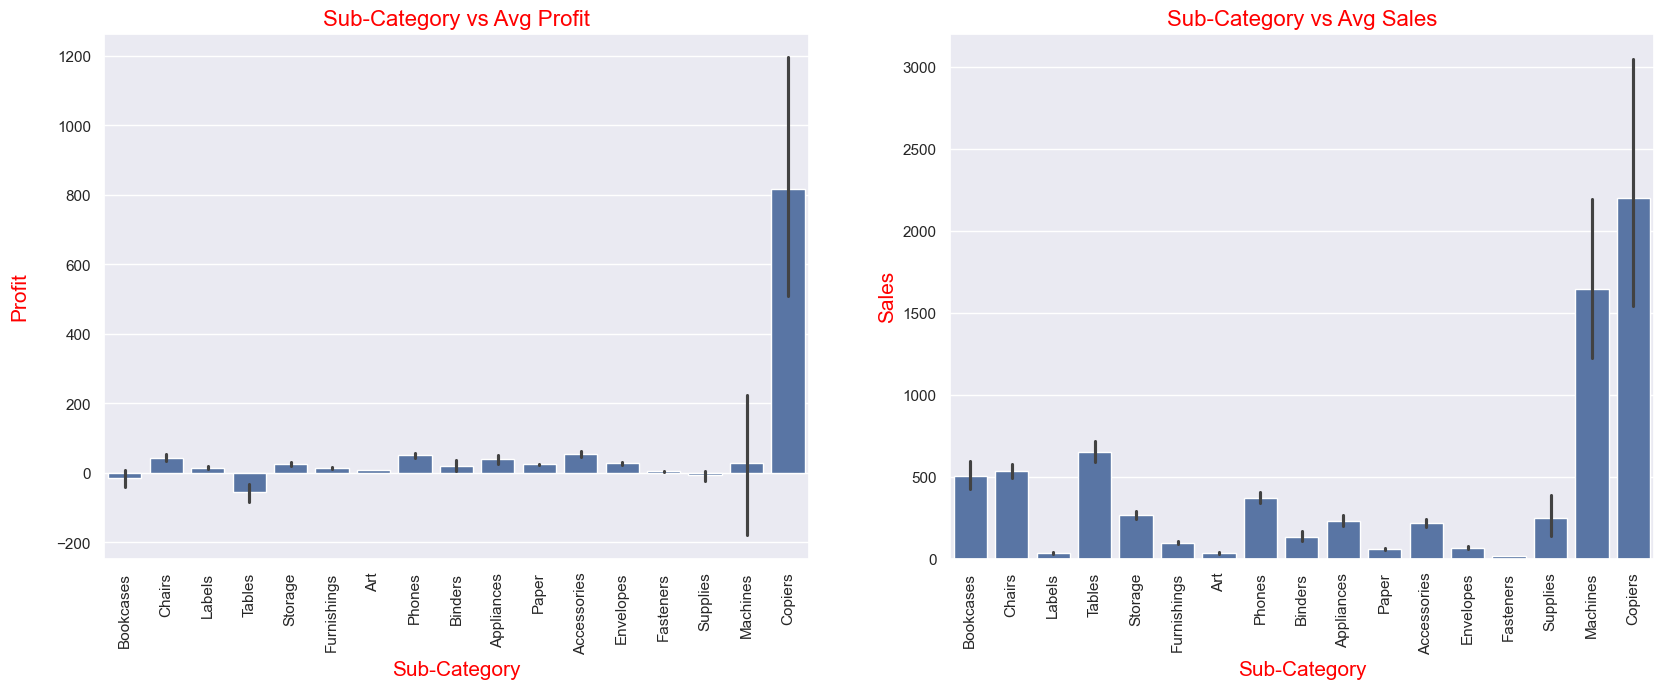

In [692]:
#bar plot of profit for different product sub-categories
plt.figure(figsize=[20,15])

plt.subplot(2,2,1)
sns.barplot(x='Sub-Category', y='Profit', data=retail)
plt.title('Sub-Category vs Avg Profit', fontdict={'color':'red','size':16})
plt.xlabel('Sub-Category', fontdict={'color':'red','size':15})
plt.ylabel('Profit\n', fontdict={'color':'red','size':15})
plt.xticks(rotation=90)

#bar plot of sales for diff sub-categories
plt.subplot(2,2,2)
sns.barplot(x='Sub-Category', y='Sales', data=retail)
plt.title('Sub-Category vs Avg Sales', fontdict={'color':'red','size':16})
plt.xlabel('Sub-Category', fontdict={'color':'red','size':15})
plt.ylabel('Sales', fontdict={'color':'red','size':15})
plt.xticks(rotation=90)
plt.show()


INFERENCE: 1. Copiers are both selling well and their profit is also remarkable.Hence market for Copiers are good.

2. Bookcases, Labels,Tables,Furnishings, Art, Binders, Fasteners, Supplies are the product categories with very low or negative profit.

3. Labels, Art, Fasteners, Paper are product categories having both less sales and profit.

Though Binders has less average profit but in count plot Binders has highest number of transactions.

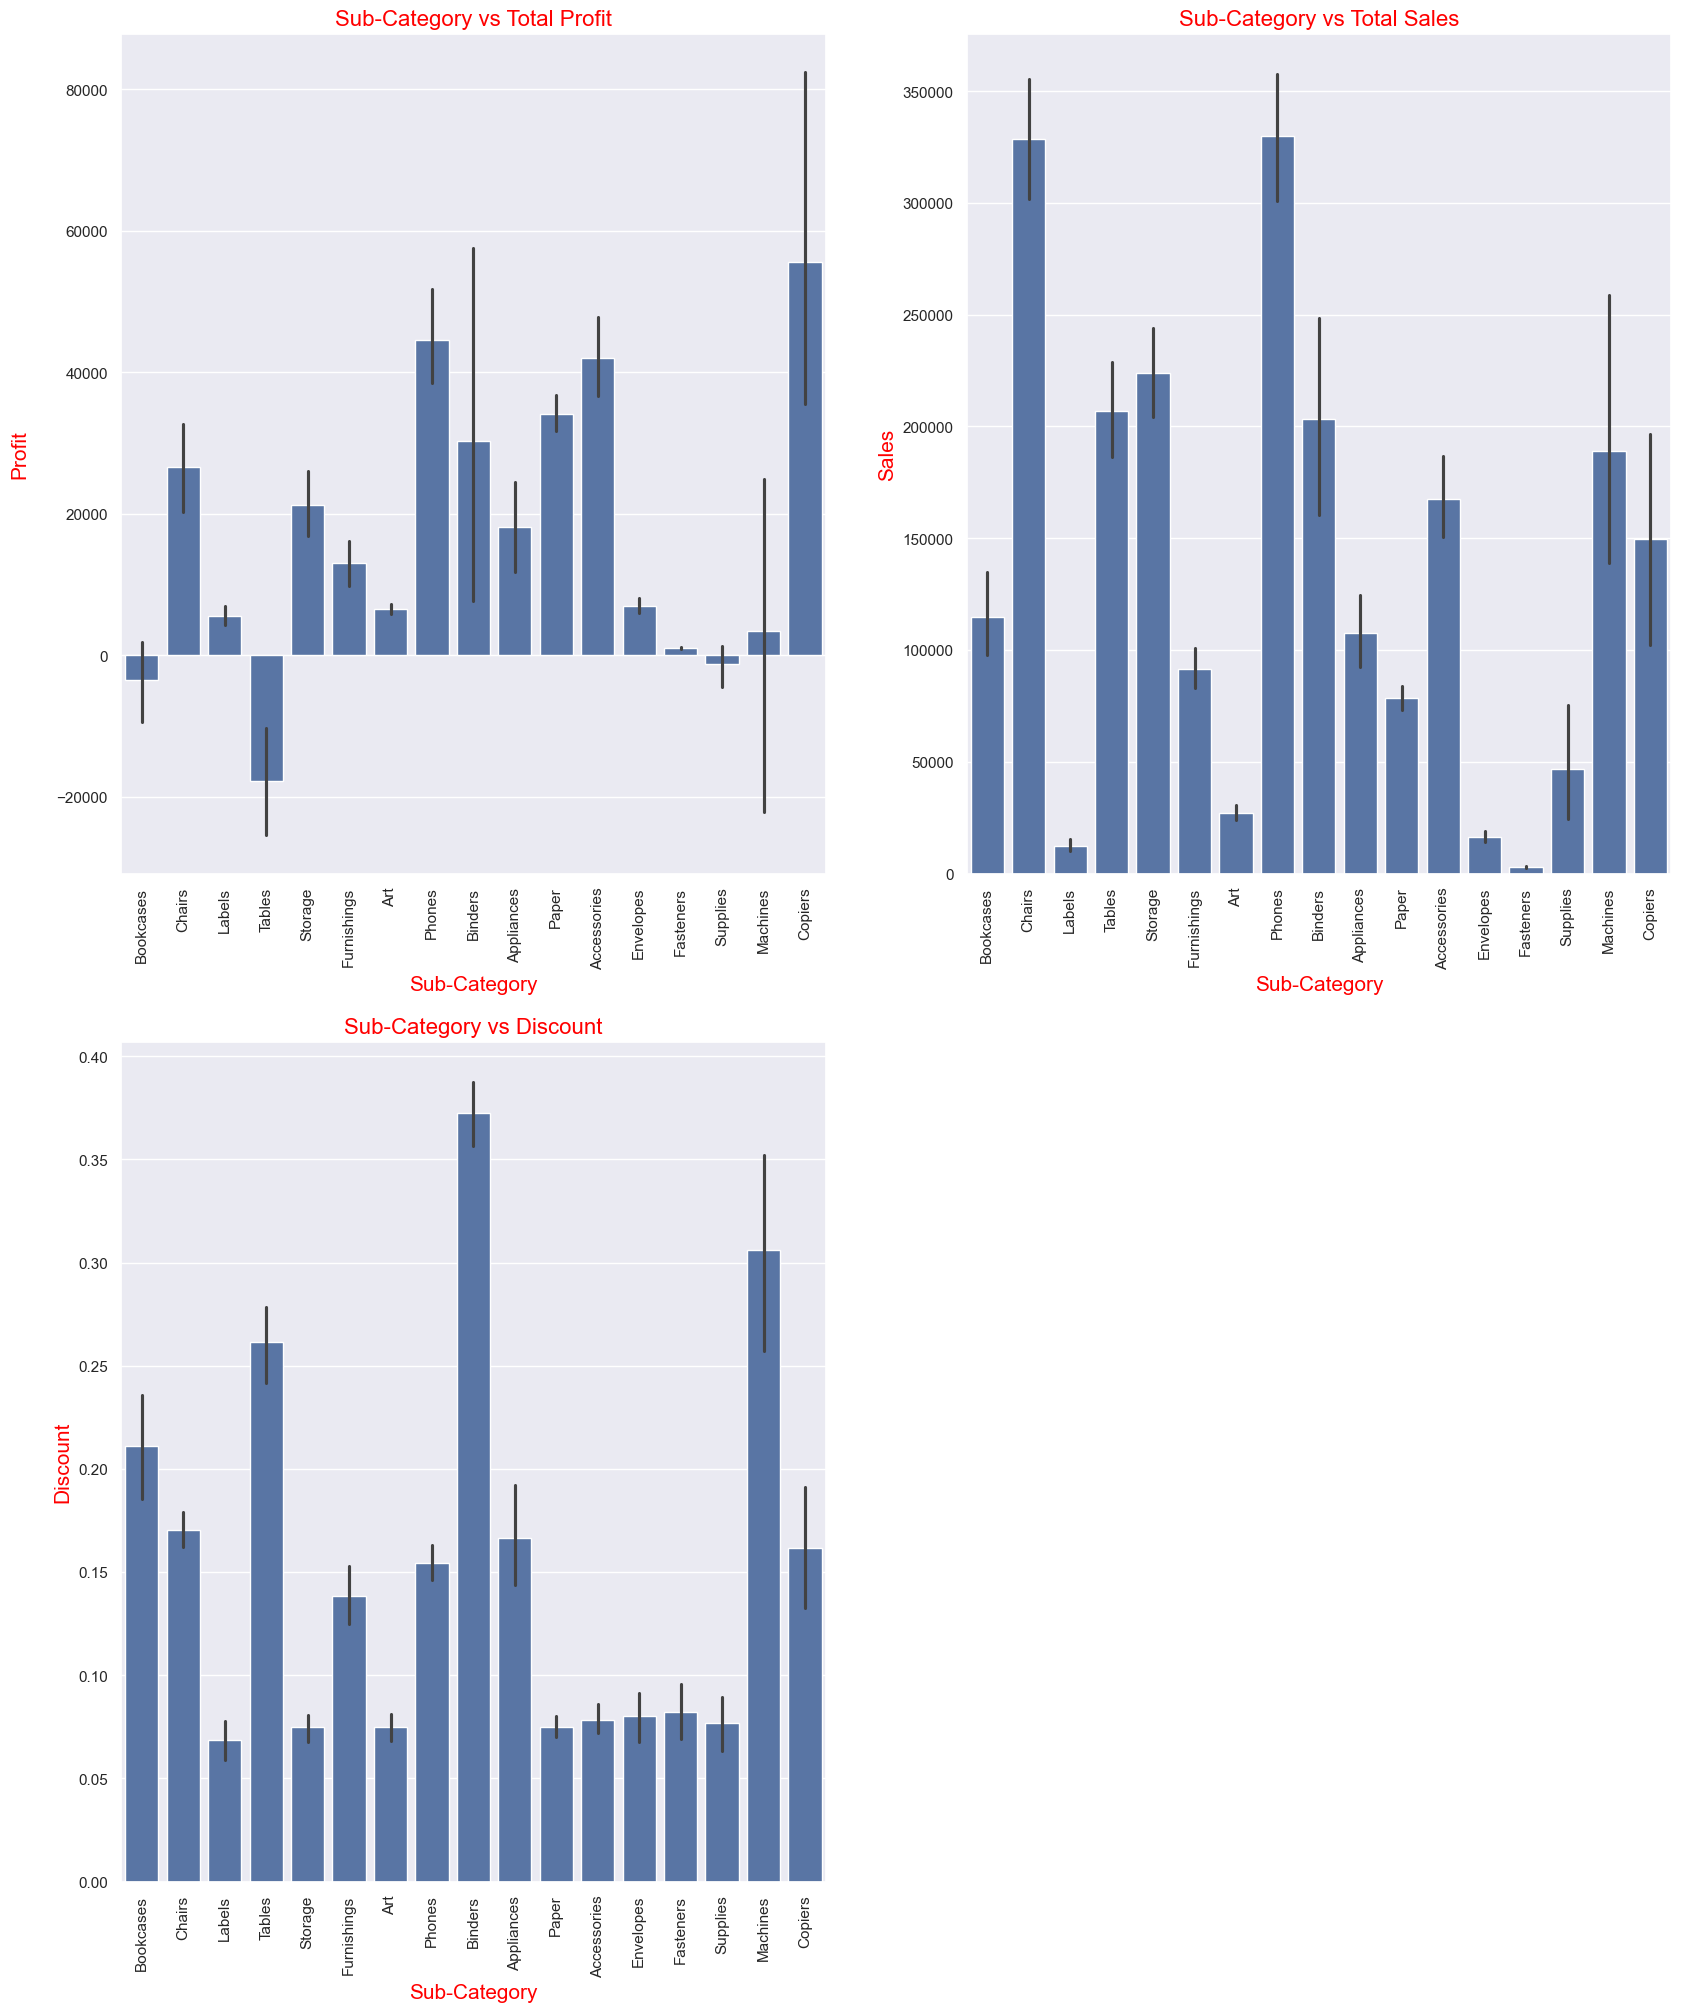

In [695]:
#plot the bar plot of total profit for different product sub-category
plt.figure(figsize=[20,24])

plt.subplot(2,2,1)
sns.barplot(x='Sub-Category',y='Profit',data=retail,estimator=sum)
plt.title('Sub-Category vs Total Profit', fontdict={'color':'red','size':16})
plt.xlabel('Sub-Category', fontdict={'color':'red','size':15})
plt.ylabel('Profit\n', fontdict={'color':'red','size':15})
plt.xticks(rotation=90)

#bar plot of total sales for different product sub-category
plt.subplot(2,2,2)
sns.barplot(x='Sub-Category',y='Sales',data=retail,estimator=sum)
plt.title('Sub-Category vs Total Sales', fontdict={'color':'red','size':16})
plt.xlabel('Sub-Category', fontdict={'color':'red','size':15})
plt.ylabel('Sales',fontdict={'color':'red','size':15})
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.barplot(x='Sub-Category',y='Discount', data=retail)
plt.title('Sub-Category vs Discount', fontdict={'color':'red','size':16})
plt.xlabel('Sub-Category',fontdict={'color':'red','size':15})
plt.ylabel('Discount', fontdict={'color':'red','size':15})
plt.xticks(rotation=90)
plt.show()




INFERENCE: 1)Binders despite having less average profit has good total profit as Binders has a good sales number. This needs to be further explored at the geographic level.Binders also has the highest discount so it might also have high loss for some pattern.

2) Sub-Categories like Bookcases, Tables, Machine have less profit or loss despite having good sales.This is because of high Discount.So we should focus on the discount provided to these sub-categories.

3) Other Sub-Categories like Labels, Art, Fasteners, Paper,  Supplies, Envelope have less profit due to less sales. So such Sub-Categories needs to be looked into.
                                                                                                                                                                                                                                                 
                                                                                                                                                                                                                                                

**City wise Profit Exploration**

The problem statement requires us to find the areas making less profit. So, by analyzing we have found that Sub-Categories Bookcases, Tables, Machine, Labels, Art, Fasteners, Paper, Supplies, Envelopes, are making either less profit or loss. Let us explore the data city wise in detail to know which cities are making loss or less profit for these Sub-Categories.

**Exploring Sub-Category vs Cities where it is sold**

In [700]:
%matplotlib inline

In [701]:
# Group the data by 'Sub-Category' and 'City' and count the number of sales
grouped_data = retail.groupby(['Sub-Category', 'City']).size().reset_index(name='Counts')

# Display the grouped data
grouped_data.head()

,Sub-Category,City,Counts
0,Accessories,Akron,2
1,Accessories,Albuquerque,2
2,Accessories,Allen,1
3,Accessories,Allentown,1
4,Accessories,Amarillo,2


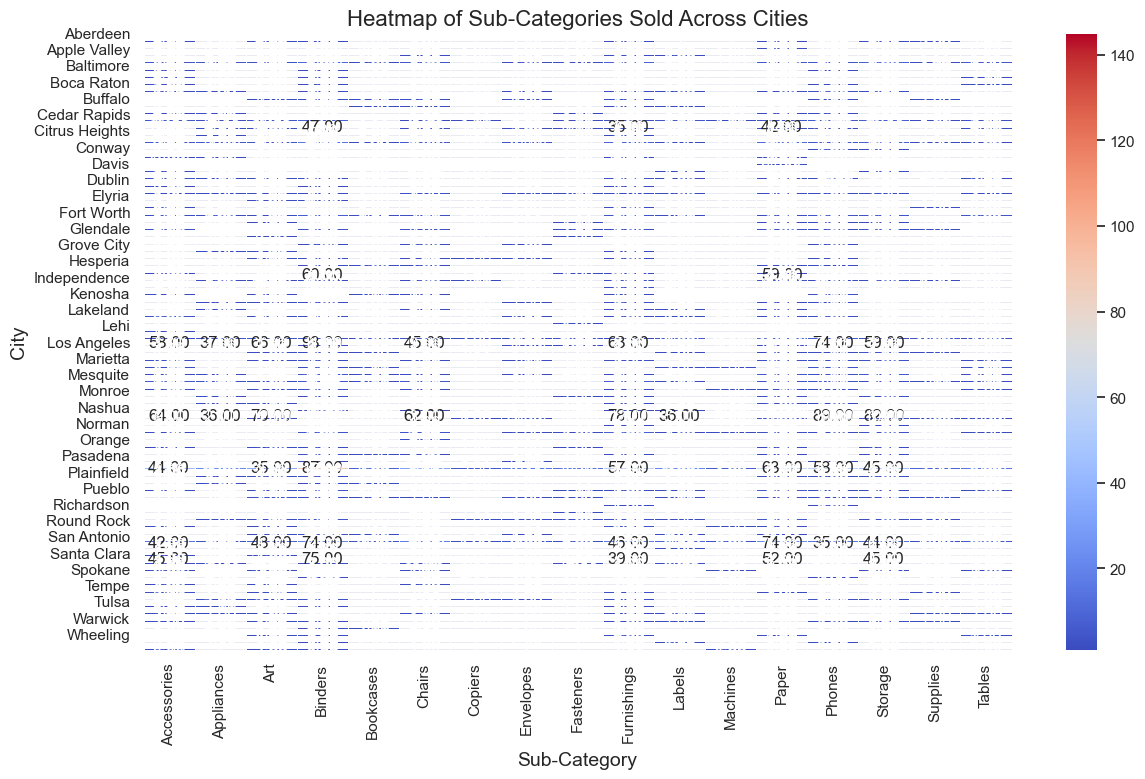

In [702]:
# Create a pivot table
pivot_data = grouped_data.pivot(index='City', columns='Sub-Category', values='Counts')

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths= 0.5, annot_kws={"fontsize":12})

plt.title('Heatmap of Sub-Categories Sold Across Cities', fontsize=16)
plt.xlabel('Sub-Category', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(rotation=90)
plt.show()

INFERENCE:The heatmap shows a varied distribution of sales across different cities and sub-categories. Some cities have higher overall sales compared to others, and certain sub-categories consistently perform better in terms of sales.
Cities like Santa Clara seem to have significantly higher sales across multiple sub-categories, indicating a potentially larger market or higher consumer spending. On the other hand, cities like Round Rock have relatively lower sales across most sub-categories.


In [704]:
# Filter the dataset to include only the sub-categories making less profit or loss
subcategories_of_interest = ['Bookcases', 'Tables', 'Machines', 'Labels', 'Art', 
                             'Fasteners', 'Paper', 'Supplies', 'Envelopes']

filtered_df = retail[retail['Sub-Category'].isin(subcategories_of_interest)]

# Group by City and Sub-Category to get the sum of profits
citywise_profit = filtered_df.groupby(['City', 'Sub-Category'])['Profit'].sum().unstack(fill_value=0)

# Sort by city with the most loss (negative profit) for easier analysis
citywise_profit = citywise_profit.sort_values(by=subcategories_of_interest, ascending=True)

citywise_profit.head(60)  # Displaying top 60 rows to get a sense of the data

Sub-Category,Art,Bookcases,Envelopes,Fasteners,Labels,Machines,Paper,Supplies,Tables
City,,,,,,,,,
Philadelphia,116.4417,-2568.1413,351.4146,29.3222,151.9096,-2219.2456,690.5440,-1351.4897,-2588.7538
Houston,135.9105,-1120.4223,468.5183,55.0327,84.7047,-999.6828,1162.5861,-14.9247,-625.0306
Colorado Springs,5.7515,-930.5344,0.0000,9.2988,0.0000,0.0000,58.1944,0.0000,-248.1660
Springfield,163.6724,-627.7062,268.4567,5.3859,182.5779,-957.9045,443.2246,87.6766,329.4573
Dallas,45.3787,-620.1858,177.5631,1.5992,9.1452,55.9986,226.5070,-3.0876,-417.5043
Denver,13.6740,-554.3802,0.0000,0.0000,0.0000,-45.9954,127.0502,-299.3016,-161.8750
Troy,23.0844,-376.6932,124.6577,0.0000,0.0000,0.0000,38.8704,0.0000,-106.3930
Phoenix,1.3276,-356.9643,0.0000,-0.9486,7.1330,-386.9570,316.1764,-34.7580,-1491.9276
Scottsdale,0.0000,-320.5970,47.9730,0.0000,0.0000,0.0000,131.1912,0.0000,0.0000


INFERENCE: 1)Philadelphia experiencing significant losses across multiple Sub-Categories

2) Houston has substantial losses in Bookcases, Machines, and Tables. Though Paper here shows positive profit.

3) Phoenix, Aurora shows significant losses in tables.

4) Springfield shows losses in Machines and Bookcases but makes profit in Tables.

**_CONCLUSION_**

•The Data is biased towards United States and hence we can drop the Country column as it will not aid in the analysis.

• As Postal Code is by region we have dropped the Postal Code to avoid redundant features during further analysis as Columns Region, City, State also gave same insights.

•Due to absence of product column we have considered Sub-Category column in our analysis for data granularity.

•Sales and Profit columns contain large number of outliers.The outliers were not treated as these extreme points might have come from some special sales days, festival offers, off-season, high discounts etc.

**Univariate Analysis**

1)Same day transactions are the lowest whereas the standard class transactions are the highest.

2)The consumer segment has the highest numbers

3)West region has the highest transaction followed by East.

4)The office supplies category shows the highest distribution.

5)The binders sub-category has the highest proportion with the copiers category having the least.

**Bivariate Analysis**

**_Numerical-Numerical Analysis_**

1)Same day transactions are the lowest whereas the standard class transactions are the highest.

2)The consumer segment has the highest numbers

3)West region has the highest transaction followed by East.

4)The office supplies category shows the highest distribution.

5)The binders sub-category has the highest proportion with the copiers cateing the least

6)For minimum discount profit was good but as discount increases profit decres

7) 
Profit is lowest aout 50% discnt.


8) At 50% discount there is peak sale and beyond 50% sales fall which might occur due to fall in product quality due to a higher rate of discount.nte least.

**_Numerical-Categorical Analysis_**

1) Observed drastic change in graphs despite having large average profit for same day shipment but it is making less overall profit and sales for business. The reason might be less people preferring same day shipment.So we should focus on same day shipment marketing.

2) Despite having large average profit and sales for Home Office segment it is making less total profit as well as total sales. The reason might be less transactions in this segment. By targetting this segment we can increase total transactions to make more profit.

3) Vermont and Wyoming with the highest sales and average profit but total profit is less. It might be due to less total transactions.

4) California, New Mexico, Kansas, South Dakota, North Dakota are some of the states having very less average profit and average sales.Though California has less average profit but we saw in univariete analysis California has more number of transactions than the other states. Hence, visualized overall profit and sales state wise.

5)  Florida, lorth Carolina, Texas, Pennsylvania, Illinois, Arizona, Tennessee, Oregon, Colorado, Ohio are the states that are completely in loss which is represented by negative profit in the graph. There no change in overall profit for these states. We should focus on such states.

6)  Central region is having minimum profit as well as sales. So. we explored pattern for Central region why it is having less profit and need to focus on that region to excel business profit.

7)  Though we've highest average profit for category Technology but we saw in count plot it has overall less transaction than other categories. Hence visualized over all Profit and Sales Category wise.

8)  As we saw clearly though category Furniture has good sales but it is making less profit. One reason might be high discount as we saw in the trend.Visualized product categories over Average Discount, and as expected products in Category Furniture has more average discount than the other categories.

9)  Copiers are making highest profit as well as sales so market is doing good in this product sub-category,Bookcases, Labels, Tables, Furnishings, Art, Binders, Fastners, Supplies are certain praduct categories which are either having very less average profit or completely in loss.Even though Binders has less average profit but we saw in count plot, Binders have highest number of transactions. Hence, overall profit of Binders are good.

10)  Also Binders have highest discount so it might have high loss for some other patterns.

11)  Sub-Categories like Bookcases, Tables, Machine have less proft or Ioss despite of having good sales. Reason behind this is highest discount.So, we could focus on the discount provided to these categories.





   





**_City-wise Profit Exploration_**

1)As we saw, Sub- Categories Bookcases, Tables, Machine, Labels, Art, Fasteners, Paper, Supplies, Envelopes are either making less profit or loss. We explored data city wise to know in which city these sub-categories are making loss or less profit.

2)This multi-variate analysis was not possible with 2-D graphs because of large no. of cities. Hence, I've created a heatmap of sub-categories sold across cities for better and handy visualization.

3)The heatmap shows a varied distribution of sales across different cities and sub-categories. Some cities have higher overall sales compared to others, and certain sub-categories consistently perform better in terms of sales. 

4)Cities like Santa Clara seem to have significantly higher sales across multiple sub-categories, indicating a potentially larger market or higher consumer spending. On the other hand, cities like Round Rock have relatively lower sales across most sub-categories.

5)Looking at city-wise profit-


•Philadelphia experiencing significant losses across multiple sub-categories.


•Houston has substantial losses in Bookcases, Machines, and Tables. Though Paper shows positive profit here.



•Phoenix, Aurora shows significant losses in Table.



•Springfield shows losses in Machines and Bookcases but makes profit in Tables.





**_RECOMMENDATIONS :_**

•We saw discount above 23% leads to loss and at 50% discount it gives highest loss. So, we should avoid to give large discount ie. beyond 23% to make profit because more discount sometimes raises doubt regarding product quality. Hence, this might decrease overall sales.

•We should focus on cities like Burlington, San Francisco as they're making large profit in Bookcases and we could make highest profit if we increase Bookcases stock in these cities as they're making large profit.

•Cities like Philadelphia, Houston, Colorado Spring are making loss, so we shouldn't increase the Bookcases stock in these area to avoid major losses.

•Settle has highest profit at minimum discount for Tables. Hence, for more business profit Tables stock needs to be increased here.

•Copiers are making highest profit as well as sales.So market is doing good in this product sub-category and hence it's stock can be increased.

•State California has more number of transactions than the other states though it's having less average profit.Product stock can be increased in this area.

•Binders have highest number of transactions.But it also has highest discount and hence loss for some patterns. So, we should handle it accordingly,

•Florida, North Carolina, Texas, Pennsylvania, Illinois, Arizona, Tennessee, Oregon, Colorado, Ohio are the states that are completely in loss. So, we should not increase stock in these areas because that would lead to a high loss in the business.

•Sub-Categories like Bookcases, Tables , Machines have less profit or loss despite of having good sales. Reason behind this might be high discount. So, we should focus on reducing the discount provided to these categories.

•Category Furniture has good sales but it is making less profit. We need to focus on the discount provided for this category.

•Since Technology is making highest average profit but having less number of transactions so we could increase the product stock for this sub-category.









**_THANK YOU!_**          